In [8]:
import gymnasium as gym

from stable_baselines3 import PPO

import matplotlib.pyplot as plt
import matplotlib
from IPython import display
%matplotlib inline


In [9]:
env = gym.make("ALE/Pong-v5", render_mode="rgb_array")

In [10]:
model = PPO("CnnPolicy", env, verbose=1)
model.learn(total_timesteps=4_000_000, log_interval=100)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1.75e+03  |
|    ep_rew_mean          | -16.5     |
| time/                   |           |
|    fps                  | 208       |
|    iterations           | 100       |
|    time_elapsed         | 983       |
|    total_timesteps      | 204800    |
| train/                  |           |
|    approx_kl            | 0.9596697 |
|    clip_fraction        | 0.541     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.542    |
|    explained_variance   | 0.585     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.106    |
|    n_updates            | 990       |
|    policy_gradient_loss | -0.0857   |
|    value_loss           | 0.0214    |
---------------------------------------
------------------------

In [8]:
model.save("ppo_pong")


# View Policy

In [4]:
model = PPO.load("ppo_pong")


KeyboardInterrupt: 

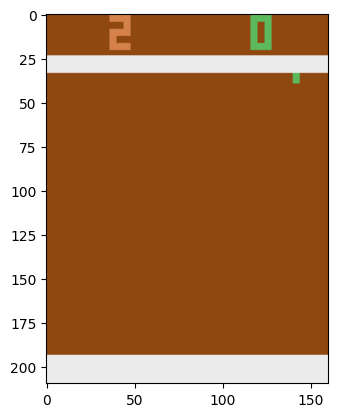

In [5]:
# del model # remove to demonstrate saving and loading
obs, info = env.reset()
img = plt.imshow(obs)
for _ in range(10_000):
    img.set_data(obs) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        obs, info = env.reset()

# Collect Data

In [3]:
model = PPO.load("ppo_pong")


In [4]:
from dataclasses import dataclass
import numpy as np

@dataclass
class Datasample:
    state: np.array
    action: int
    reward: int
    next_state: np.array
    done: bool
    trajectory_id: int
    timestamp: int

In [5]:
dataset = []
max_trajectory_id = 0

In [6]:
N_games = 10_000
MAX_TRAJ_LENGTH = 10_000

for traj_id in range(N_games):

    obs, info = env.reset()
    for i in range(10_000):
        action, _states = model.predict(obs, deterministic=True)
        next_obs, reward, terminated, truncated, info = env.step(action)
        
        max_trajectory_id = max(traj_id + 1, max_trajectory_id + 1)
        dt = Datasample(
            state=obs,
            action=action,
            reward=reward,
            next_state=next_obs,
            done = terminated or truncated,
            trajectory_id=max_trajectory_id,
            timestamp=i
        )

        
        dataset.append(dt)

        if terminated or truncated:
            obs, info = env.reset()
            break
        
        obs = next_obs
    
    expert_dataset = np.array(dataset)
    with open("expert_dataset.npy", "wb") as f:
        np.save(f, expert_dataset)

OSError: [Errno 122] Disk quota exceeded

In [1]:
expert_dataset = np.array(dataset)
with open("expert_dataset.npy", "wb") as f:
    np.save(f, expert_dataset)

NameError: name 'np' is not defined

# Loading Dataset

In [7]:
loaded_dataset = np.load("expert_dataset.npy", allow_pickle=True)
loaded_dataset

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


UnpicklingError: invalid load key, '\x00'.

In [14]:
dataset